# Comparison between Logistic Regression and Decision Trees Classifier using Scikit-learn

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
%matplotlib inline

The dataset provides information regarding the age ,gender and Estimated Salary. There is one more column in dataset which is our target variable i.e Purchased.

In [2]:
#Importing the dataset
data = pd.read_csv('Social_Network_Ads.csv')
data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
#Checking for NaN value
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
#Compute the correlation matrix
corr = data.corr()

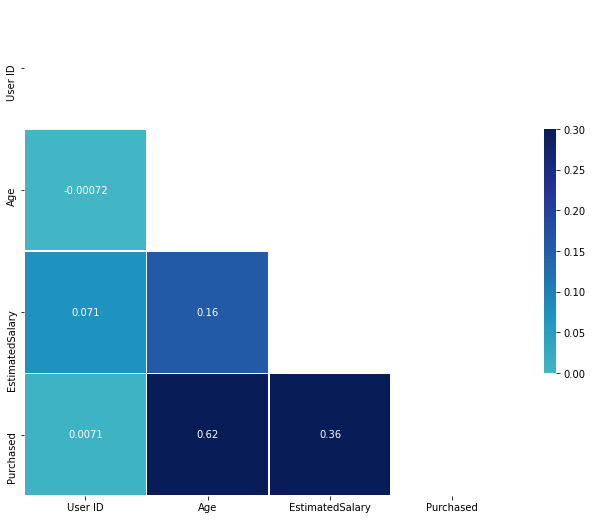

In [5]:
#Use a mask to plot only part of a matrix 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu", vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})

Purchased is highly correlated with Age and EstimatedSalary

In [6]:
#Storing Age and EstimatedSalary in X & Purchased in y
X = data.iloc[:,[2,3]].values
y = data.iloc[:,4].values

In [7]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0)

In [8]:
#Shape of X_train,X_test,y_train,y_test
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (300, 2)
X_test: (100, 2)
y_train: (300,)
y_test: (100,)


In [9]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## First implementing the Logistic Regression model

In [10]:
#Classifying and prediction 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred_regression = classifier.predict(X_test)

In [11]:
print("test--",y_test[:20])
print("pred--",y_pred_regression[:20])

test-- [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
pred-- [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0]


Visualization of the performance of an algorithm

In [12]:
#Making the Confusion Matrix (How many incorrect predictions in the model)

from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [13]:
confusion_matrix(y_test, y_pred_regression)

array([[65,  3],
       [ 8, 24]])

In [14]:
print("accuracy score:",accuracy_score(y_test,y_pred_regression)*100)

accuracy score: 89.0


In [15]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(accuracies.mean(),accuracies.std()))

Mean Accuracy: 0.82, Std of Accuracy: 0.10


Visualizing the model through plots

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


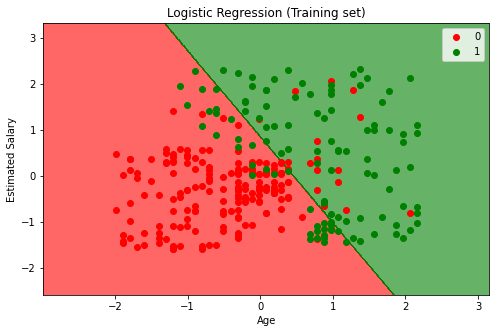

In [16]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8,5))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


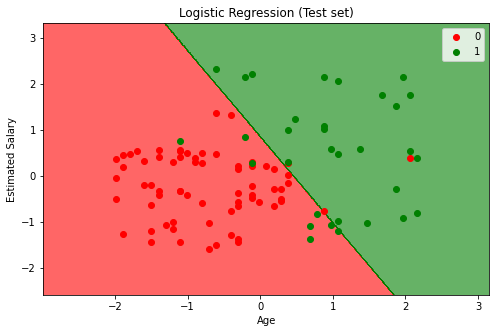

In [17]:
# Visualizing the Test set results
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8,5))
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Implementing Desicion Trees Classifier model

The important parameters for DecisionTreeClassifier class.

criterion: optional (default=”gini”) or Choose attribute selection measure:Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

max_depth: int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In criterion you can also go with "gini" ,then the decision tree classifier gave an accuracy of 91%.

In [18]:
from sklearn.tree import DecisionTreeClassifier
Dclassifier = DecisionTreeClassifier(criterion="entropy", max_depth=3) 
Dclassifier = Dclassifier.fit(X_train,y_train) 
pred_tree = Dclassifier.predict(X_test) 


In [19]:
print("test--",y_test[:20])
print("pred--",pred_tree[:20])

test-- [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
pred-- [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0]


Visualization of the performance of an algorithm

In [20]:
confusion_matrix(y_test, pred_tree)


array([[64,  4],
       [ 2, 30]])

In [21]:
print("accuracy score:",accuracy_score(y_test,pred_tree)*100)

accuracy score: 94.0


In [22]:
accuracies = cross_val_score(estimator = Dclassifier, X = X_train, y = y_train, cv = 10)
print('Mean Accuracy: {0:.2f}, Std of Accuracy: {1:.2f}'.format(accuracies.mean(),accuracies.std()))

Mean Accuracy: 0.89, Std of Accuracy: 0.07


Visualizing the model through plots

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


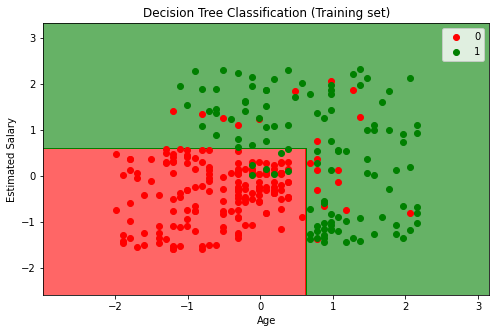

In [23]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8,5))
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, Dclassifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


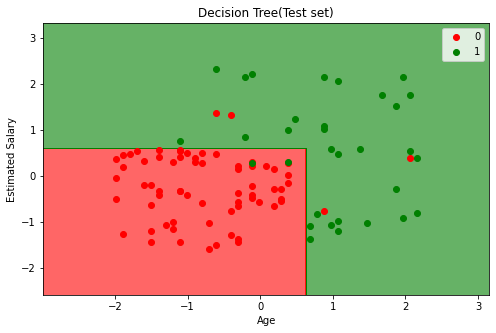

In [24]:
#Visualizing the Test set results
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8,5))
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop= X_set[:,0].max()+1, step = 0.01),np.arange(start = X_set[:,1].min()-1, stop= X_set[:,1].max()+1, step = 0.01))
plt.contourf(X1,X2, Dclassifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.6, cmap = ListedColormap(("red","green")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1], c = ListedColormap(("red","green"))(i),label = j)
plt.title("Decision Tree(Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

Conclusion:- Visualizing the plots of both the model we can say that both the model performed good and Decision tree classifier accuracy (94%) is high than Logistic Regression model (89%).